# Common Distributions
The ones that are most used by Bayesian practioners

In [2]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns
import scipy
from scipy import stats

You are running the v4 development version of PyMC which currently still lacks key features. You probably want to use the stable v3 instead which you can either install via conda or find on the v3 GitHub branch: https://github.com/pymc-devs/pymc/tree/v3


In [6]:
az.style.use("arviz-darkgrid")
RANDOM_SEED = 3
np.random.seed(RANDOM_SEED)

# There are many distributions
* We'll cover the most typically used ones here
  * With just these few you can do the vast majority of Bayesian work
  * Any of the more specialized ones are easy to learn if you end up needed them

In [13]:
def plot_format():
    plt.xlabel('x', fontsize=12)
    plt.ylabel('f(x)', fontsize=12)
    plt.ylim(0)
    plt.legend(loc=9)
    plt.show()

# Discrete Distributions
Great for

* Counts
* Binary Outcomes (which are just counts)
* Categories (which are also just counts)

# Bernoulli
* Binary outcomes as we've seen in AB Testing and in this lesson
* Plotted here with lines so we can see more than one

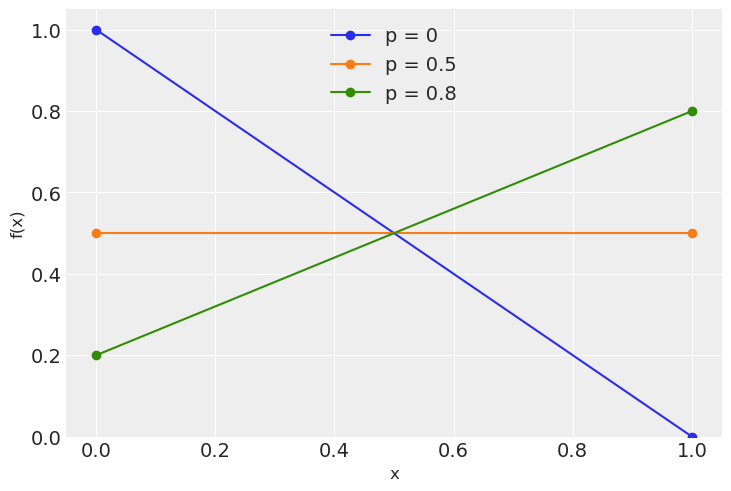

In [15]:
x = [0, 1]
for p in [0, 0.5, 0.8]:
    pmf = stats.bernoulli.pmf(x, p)
    plt.plot(x, pmf, '-o', label='p = {}'.format(p))
plot_format()

# Binomial
* Count of "success" in a fixed number
* Proportion in a group

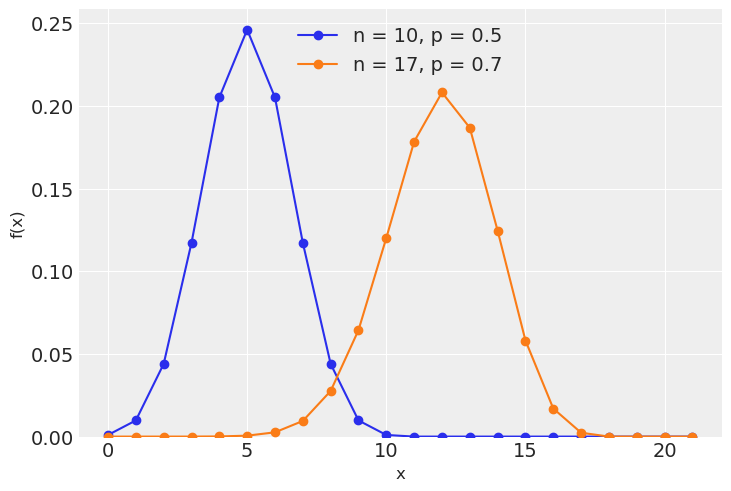

In [17]:
x = np.arange(0, 22)
ns = [10, 17]
ps = [0.5, 0.7]
for n, p in zip(ns, ps):
    pmf = stats.binom.pmf(x, n, p)
    plt.plot(x, pmf, '-o', label='n = {}, p = {}'.format(n, p))
plot_format()

# Categorical
* Counts from categories
 * "There are red, green, and blue, balls in a jar, whats the probability of picking each one?"

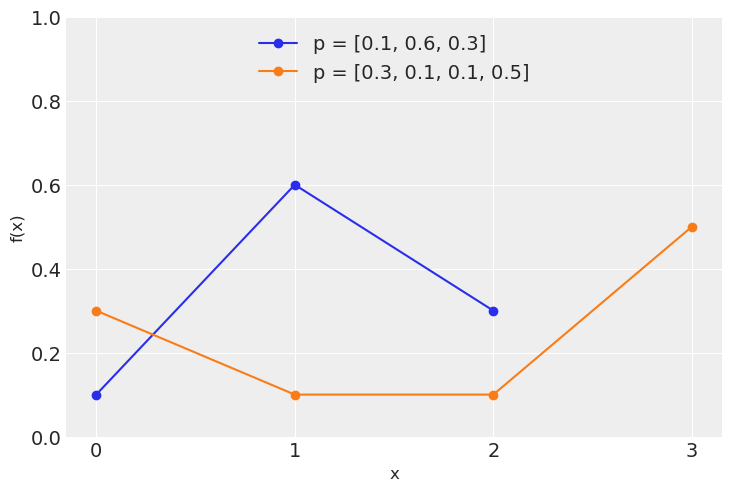

In [28]:
ps = [[0.1, 0.6, 0.3], [0.3, 0.1, 0.1, 0.5]]
for p in ps:
    x = range(len(p))
    plt.plot(x, p, '-o', label='p = {}'.format(p))
plt.xticks(np.arange(4))
plt.ylim([0,1])

plot_format()


# Continuous Distributions

# Beta
Great for things that are bounded from 0 to like proabilities or bounded percentages

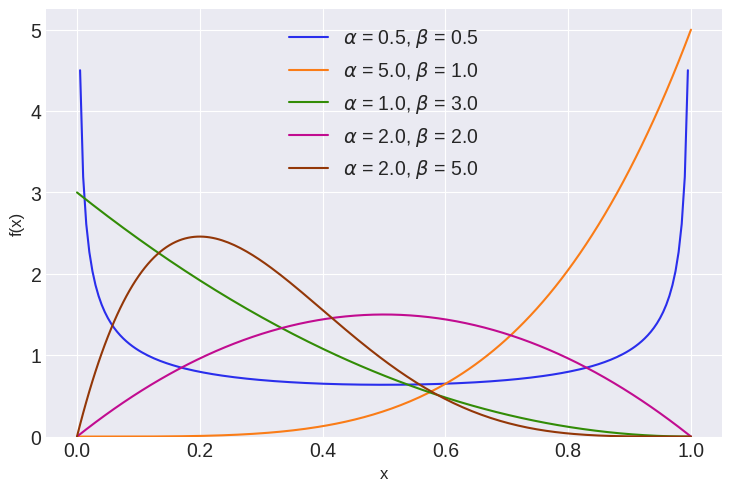

In [29]:
plt.style.use('seaborn-darkgrid')
x = np.linspace(0, 1, 200)
alphas = [.5, 5., 1., 2., 2.]
betas = [.5, 1., 3., 2., 5.]
for a, b in zip(alphas, betas):
    pdf = stats.beta.pdf(x, a, b)
    plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))
plot_format()


# Normal
* Very popular due to Central Limit Theorem and Frequentist statistics
* Still great in Bayesian context though the point above is not as necessary for us

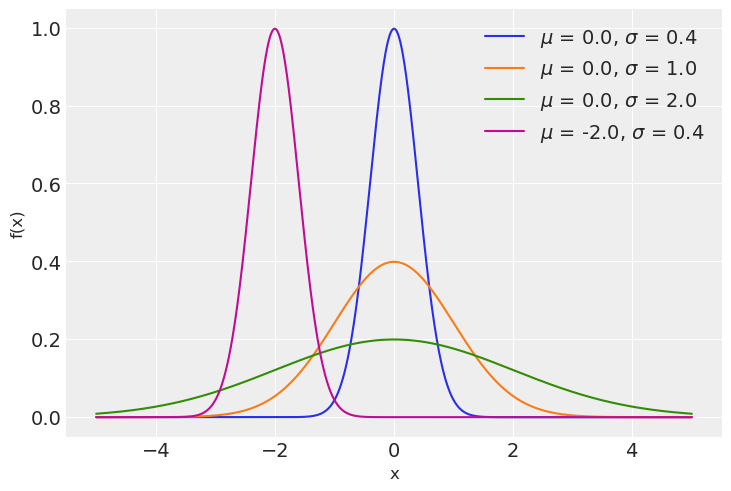

In [7]:
x = np.linspace(-5, 5, 1000)
mus = [0., 0., 0., -2.]
sigmas = [0.4, 1., 2., 0.4]
for mu, sigma in zip(mus, sigmas):
    pdf = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, pdf, label=r'$\mu$ = {}, $\sigma$ = {}'.format(mu, sigma))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)
plt.show()

# Student T
* Like the Normal distribution but with heavier tails
  * This is great for handling outliers

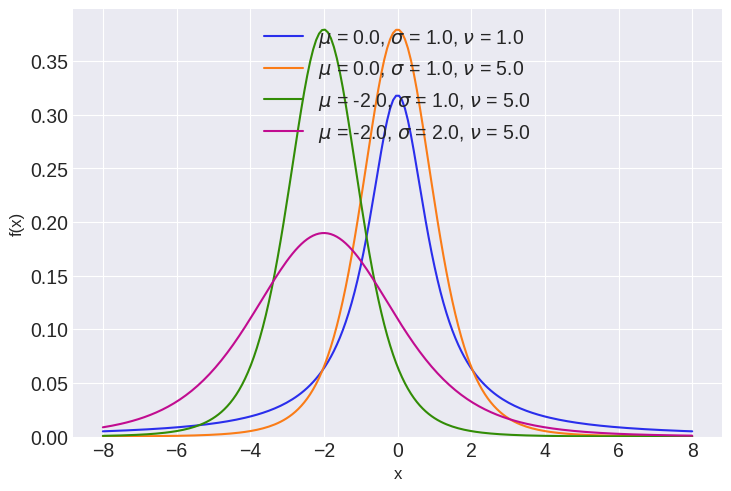

In [31]:
x = np.linspace(-8, 8, 200)
mus = [0., 0., -2., -2.]
sigmas = [1., 1., 1., 2.]
dfs = [1., 5., 5., 5.]
for mu, sigma, df in zip(mus, sigmas, dfs):
    pdf = stats.t.pdf(x, df, loc=mu, scale=sigma)
    plt.plot(x, pdf, label=r'$\mu$ = {}, $\sigma$ = {}, $\nu$ = {}'.format(mu, sigma, df))
plot_format()


# Half Versions of Normal, Student T
* Same idea but for things things that can only be positive

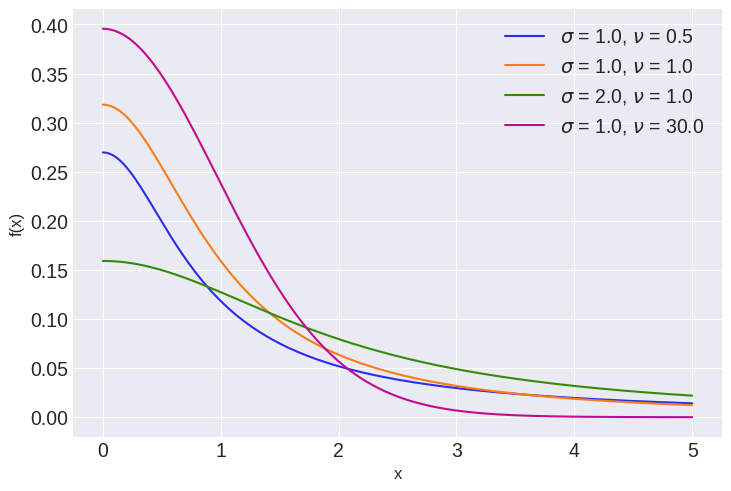

In [33]:
x = np.linspace(0, 5, 200)
sigmas = [1., 1., 2., 1.]
nus = [.5, 1., 1., 30.]
for sigma, nu in zip(sigmas, nus):
    pdf = stats.t.pdf(x, df=nu, loc=0, scale=sigma)
    plt.plot(x, pdf, label=r'$\sigma$ = {}, $\nu$ = {}'.format(sigma, nu))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)
plt.show()

# Log Normal
?

# Gamma
? 

# Section Recap
* The distributions covered here will be nearly all you need
* There are many more distributions but it's easy enough to learn them as you go